In [35]:
print("Hello")
import mglearn
import warnings
warnings.filterwarnings('ignore')

Hello


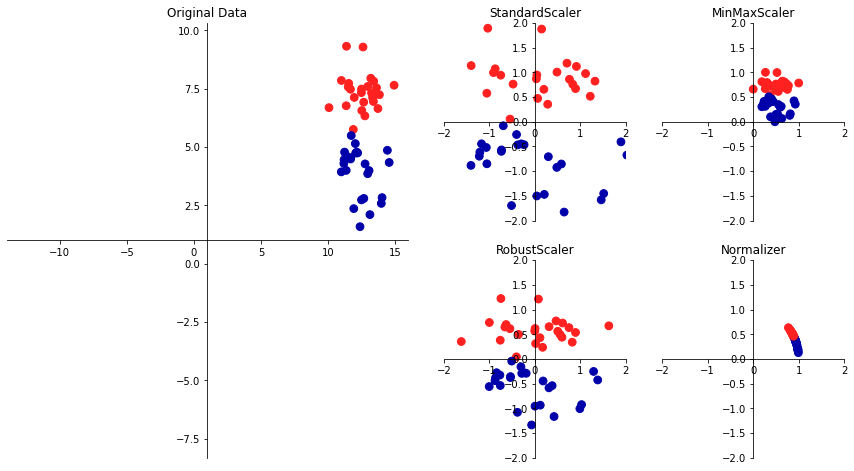

In [4]:
mglearn.plots.plot_scaling()

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [9]:
cancer = load_breast_cancer()

In [10]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [14]:
scaler.fit(X_train)

MinMaxScaler()

In [15]:
X_train_scaled = scaler.transform(X_train)

In [24]:
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print('{}'.format(X_train_scaled.min(axis=0)))
print(X_train_scaled.max(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.628e-01 7.570e-01 7.228e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.811e+01 3.381e+01 1.885e+02 2.501e+03 1.447e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 2.333e-02 1.064e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.903e-01
 6.638e-01 2.075e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [26]:
from sklearn.datasets import make_blobs

In [28]:
X,_ =  make_blobs(n_samples=50,centers=4,random_state=2,cluster_std=2)

In [29]:
X_train,X_test = train_test_split(X,random_state=4,test_size=0.1)

In [30]:
import matplotlib.pyplot as plt

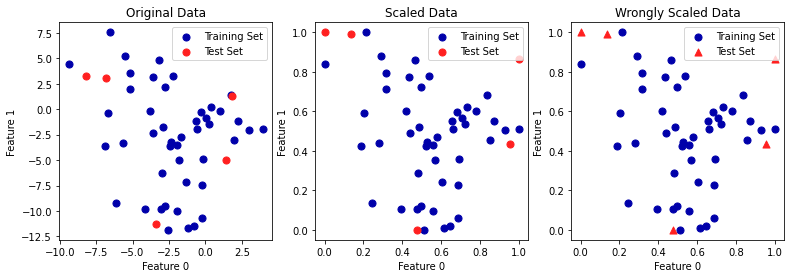

In [42]:
fig, axes = plt.subplots(1,3,figsize=(13,4))

axes[0].scatter(X_train[:,0],X_train[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[0].scatter(X_test[:,0],X_test[:,1],color=mglearn.cm2(1),s=50,label='Test Set')
axes[0].legend()
axes[0].set_title('Original Data')

scale = MinMaxScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled =  scale.fit_transform(X_test)


axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],color=mglearn.cm2(1),s=50,label='Test Set')
axes[1].legend()
axes[1].set_title('Scaled Data')


t_scale = MinMaxScaler()
X_test_scaled_ =  t_scale.fit_transform(X_test)


axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],color=mglearn.cm2(0),s=50,label='Training Set')
axes[2].scatter(X_test_scaled_[:,0],X_test_scaled_[:,1],marker='^',color=mglearn.cm2(1),s=50,label='Test Set')
axes[2].legend()
axes[2].set_title('Wrongly Scaled Data')


for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')


In [44]:
from sklearn.svm import SVC

In [46]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.3,random_state=0)

In [60]:
svc = SVC(C=100)
svc.fit(X_train,y_train)

SVC(C=100)

In [61]:
print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.9346733668341709
0.9532163742690059


In [64]:
X_train_scaled =  scale.fit_transform(X_train)
scale.fit(X_train)
X_test_scaled = scale.transform(X_test)

In [65]:
svc.fit(X_train_scaled,y_train)
print(svc.score(X_train_scaled,y_train))
print(svc.score(X_test_scaled,y_test))

1.0
0.9707602339181286


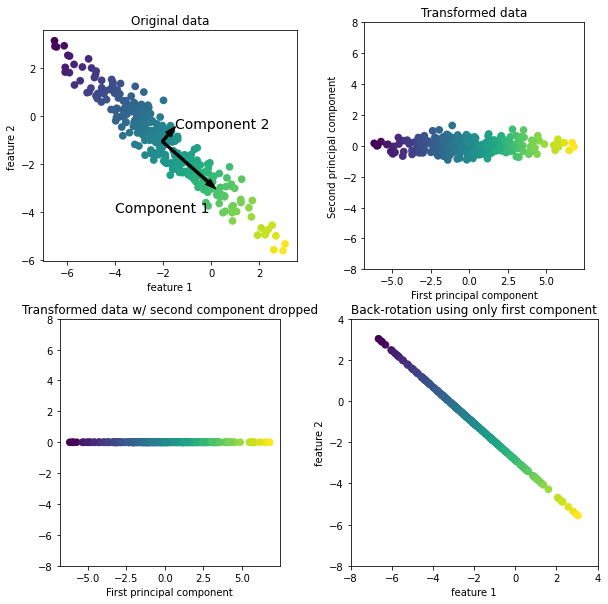

In [67]:
mglearn.plots.plot_pca_illustration()

In [70]:
print(cancer.get('DESCR'))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

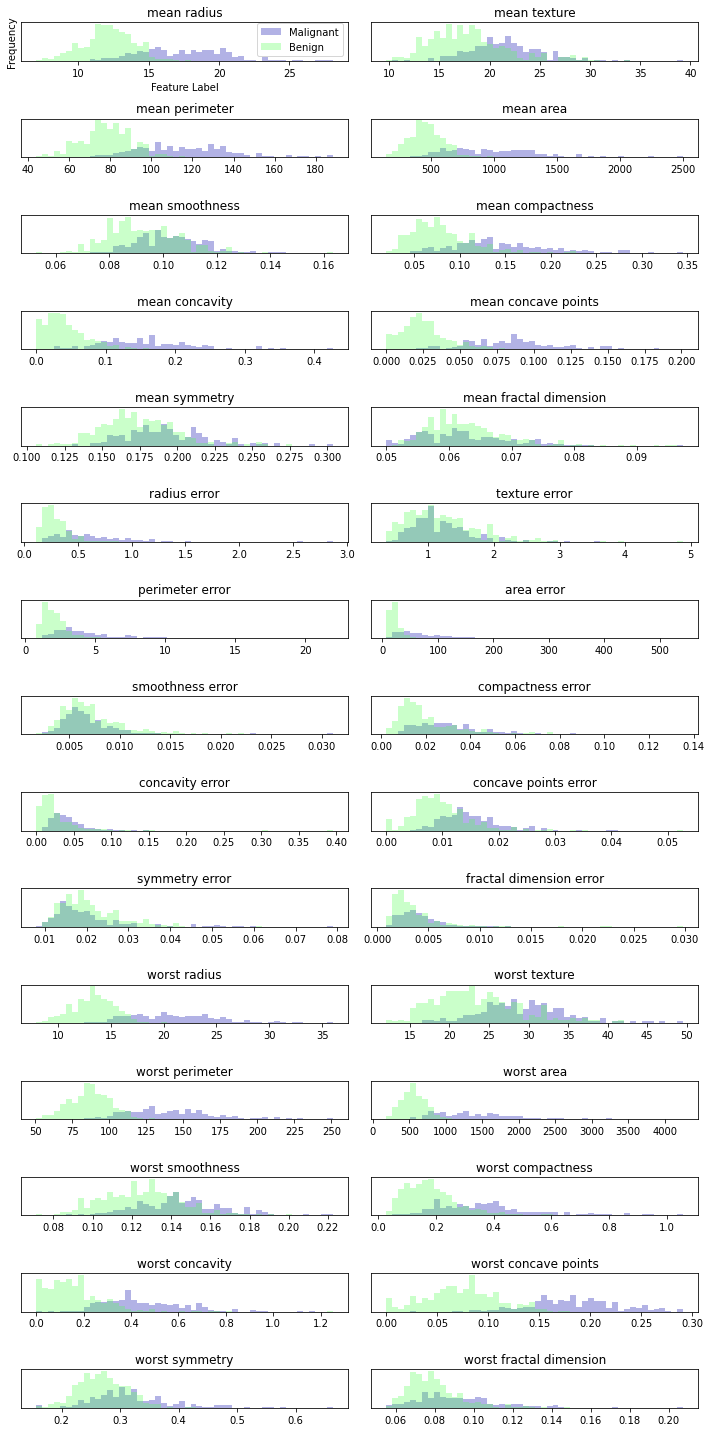

In [80]:
import numpy as np
fig, axes = plt.subplots(15,2,figsize = (10,20))

malignant = cancer.data[cancer.target ==0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins = 50)
    ax[i].hist(malignant[:,i],bins=bins,color = mglearn.cm3(0),alpha=0.3)
    ax[i].hist(benign[:,i],bins=bins,color = mglearn.cm3(2),alpha=0.3)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('Feature Label')
ax[0].set_ylabel('Frequency')
ax[0].legend(['Malignant','Benign'],loc='best')
fig.tight_layout()

In [82]:
from sklearn.preprocessing import StandardScaler

In [84]:
scale = StandardScaler()
scale.fit(cancer.data)
X_scaled = scale.transform(cancer.data)

In [86]:
from sklearn.decomposition import PCA

In [87]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

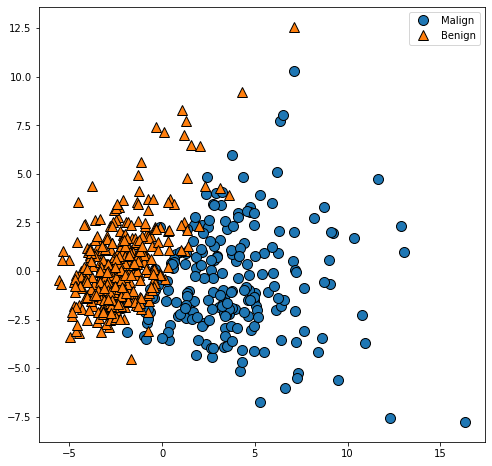

In [91]:
plt.figure(figsize=(8,8))

mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(['Malign','Benign'],loc='best')

Text(0, 0.5, '')

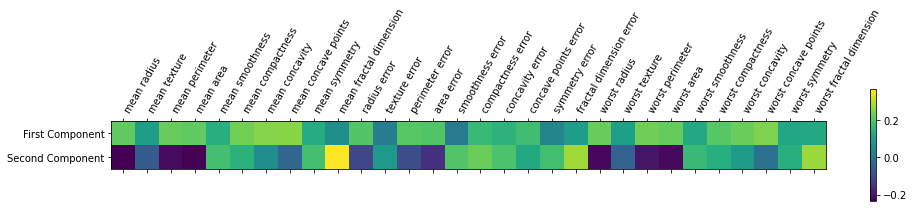

In [95]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['First Component','Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=60,ha='left')
plt.xlabel('')
plt.ylabel('')

In [96]:
print('PCA Components: {}'.format(pca.components_))

PCA Components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


#  PCA Feature Extraction

In [97]:
from sklearn.datasets import fetch_lfw_people

In [98]:
faces  = fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [100]:
image_shape = faces.images[0].shape
print(image_shape)

(87, 65)


In [103]:
print(faces.keys())

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])


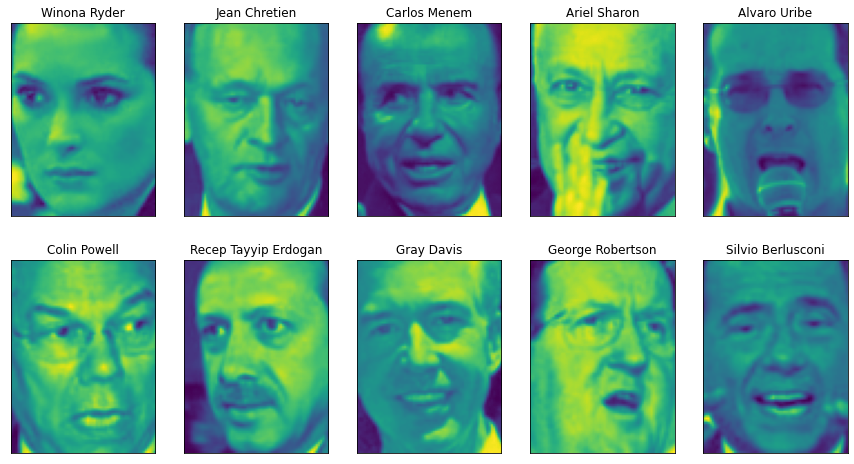

In [104]:
fig,axes = plt.subplots(2,5, figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target, image,ax in zip(faces.target,faces.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(faces.target_names[target])

In [105]:
faces.images.shape

(3023, 87, 65)

In [106]:
len(faces.target_names)

62

In [111]:
counts = np.bincount(faces.target)


for i, (count,name) in enumerate(zip(counts,faces.target_names)):
    print('{}  {}'.format(name,count),end=' ')
    if((i+2)%3 == 0):
        print()

Alejandro Toledo  39 Alvaro Uribe  35 
Amelie Mauresmo  21 Andre Agassi  36 Angelina Jolie  20 
Ariel Sharon  77 Arnold Schwarzenegger  42 Atal Bihari Vajpayee  24 
Bill Clinton  29 Carlos Menem  21 Colin Powell  236 
David Beckham  31 Donald Rumsfeld  121 George Robertson  22 
George W Bush  530 Gerhard Schroeder  109 Gloria Macapagal Arroyo  44 
Gray Davis  26 Guillermo Coria  30 Hamid Karzai  22 
Hans Blix  39 Hugo Chavez  71 Igor Ivanov  20 
Jack Straw  28 Jacques Chirac  52 Jean Chretien  55 
Jennifer Aniston  21 Jennifer Capriati  42 Jennifer Lopez  21 
Jeremy Greenstock  24 Jiang Zemin  20 John Ashcroft  53 
John Negroponte  31 Jose Maria Aznar  23 Juan Carlos Ferrero  28 
Junichiro Koizumi  60 Kofi Annan  32 Laura Bush  41 
Lindsay Davenport  22 Lleyton Hewitt  41 Luiz Inacio Lula da Silva  48 
Mahmoud Abbas  29 Megawati Sukarnoputri  33 Michael Bloomberg  20 
Naomi Watts  22 Nestor Kirchner  37 Paul Bremer  20 
Pete Sampras  22 Recep Tayyip Erdogan  30 Ricardo Lagos  27 
Roh M

In [117]:
mask =  np.zeros(faces.target.shape,dtype=np.bool)

for target in np.unique(faces.target):
    mask[np.where(faces.target == target)[0][:50]] = 1


array([ True,  True,  True, ..., False, False, False])

In [123]:
print(mask)

[ True  True  True ... False False False]


In [128]:
X_people = faces.data[mask]
y_people = faces.target[mask]

In [129]:
X_people =  X_people/255

In [136]:
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test,y_train,y_test =  train_test_split(X_people,y_people,stratify=y_people,random_state=42)

knn =  KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)

1.0

In [137]:
knn.score(X_test,y_test)

0.2558139534883721

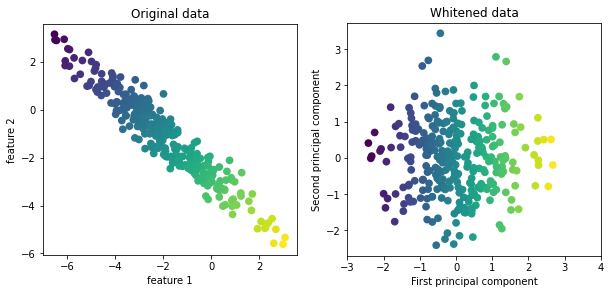

In [138]:
mglearn.plots.plot_pca_whitening()

In [139]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)

In [141]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [143]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
knn.score(X_test_pca,y_test)

0.3333333333333333

In [144]:
pca.components_.shape

(100, 5655)

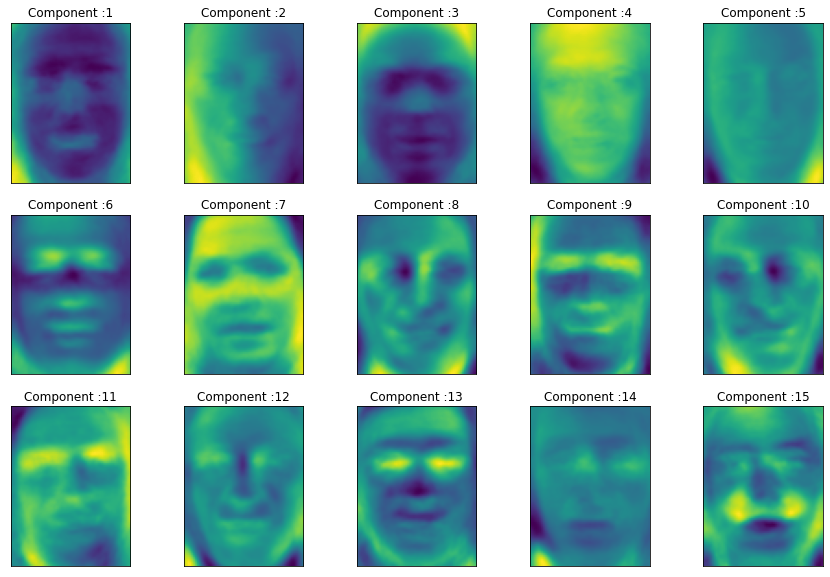

In [153]:
fig,axes = plt.subplots(3,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})

for i, (component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("Component :{}".format(i+1))

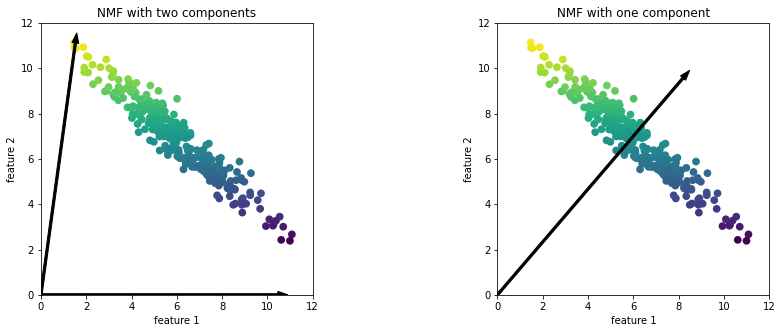

In [154]:
mglearn.plots.plot_nmf_illustration()

In [155]:
from sklearn.decomposition import NMF

In [156]:
nmf = NMF(n_components=15,random_state=0)

In [158]:
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

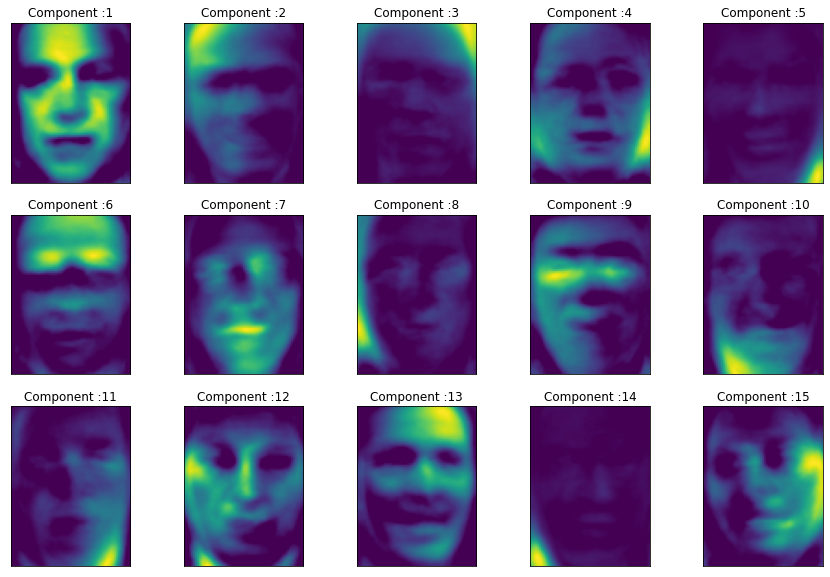

In [159]:
fig,axes = plt.subplots(3,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})

for i, (component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("Component :{}".format(i+1))

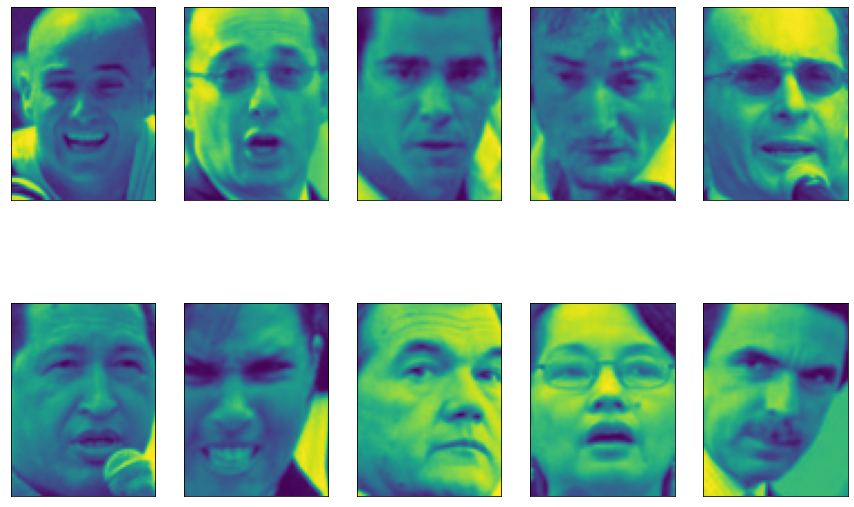

In [162]:
comp = 3
fig,axes = plt.subplots(2,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})
inds =  np.argsort(X_train_nmf[:,comp],)[::-1]

for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    


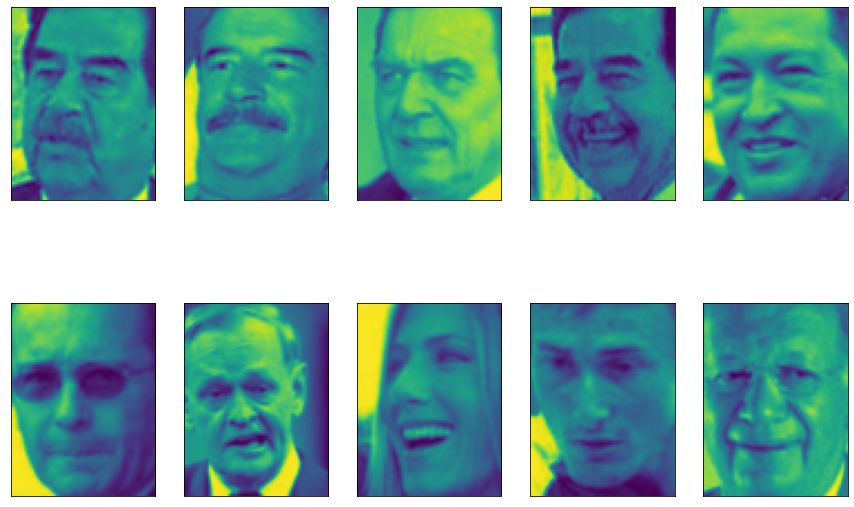

In [163]:
comp = 7
fig,axes = plt.subplots(2,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})
inds =  np.argsort(X_train_nmf[:,comp],)[::-1]

for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    


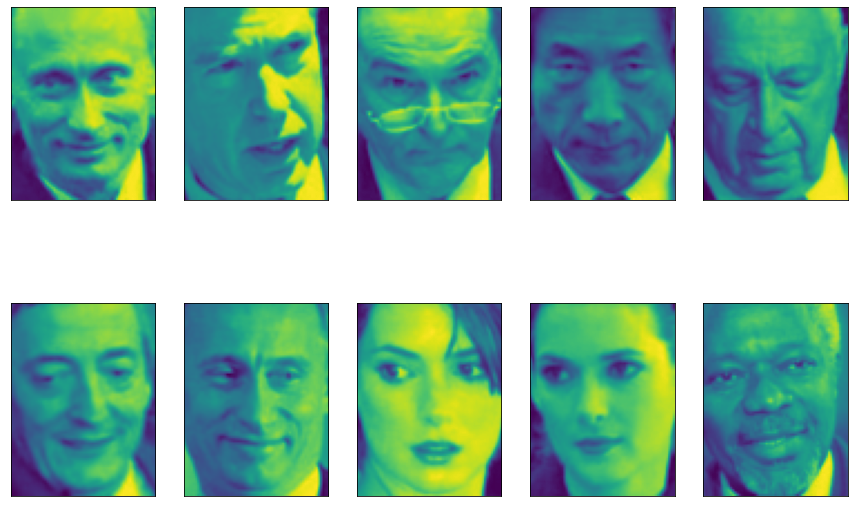

In [164]:
comp = 10
fig,axes = plt.subplots(2,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})
inds =  np.argsort(X_train_nmf[:,comp],)[::-1]

for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    


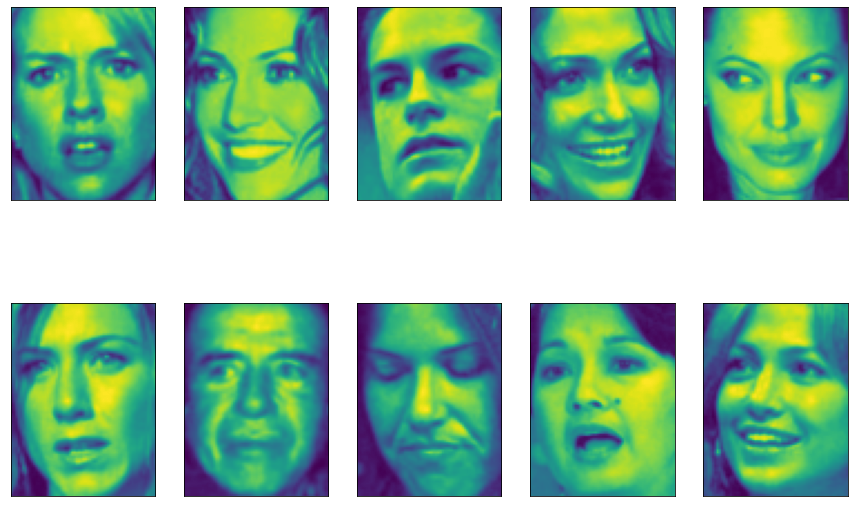

In [165]:
comp = 0
fig,axes = plt.subplots(2,5,figsize=(15,10),subplot_kw={'xticks':(),'yticks':()})
inds =  np.argsort(X_train_nmf[:,comp],)[::-1]

for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    


In [166]:
from sklearn.datasets import load_digits

In [167]:
digits = load_digits()

In [168]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

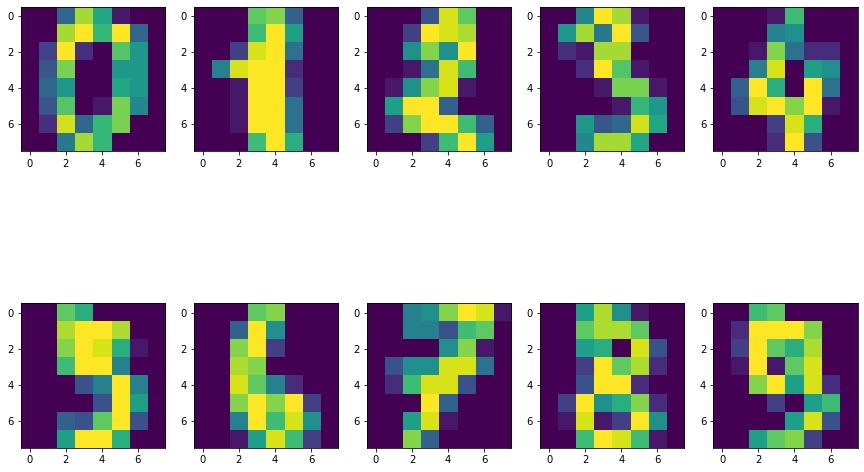

In [169]:
fig, axes = plt.subplots(2,5,figsize=(15,10))

for img, ax in zip(digits.images,axes.ravel()):
    ax.imshow(img)

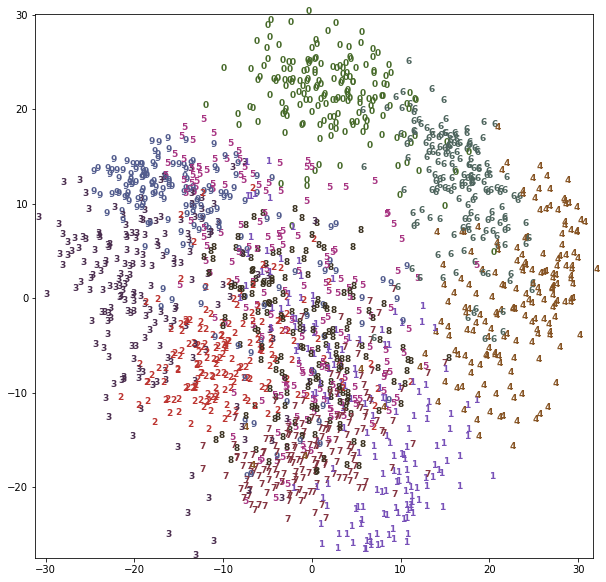

In [173]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})

In [175]:
from sklearn.manifold import TSNE

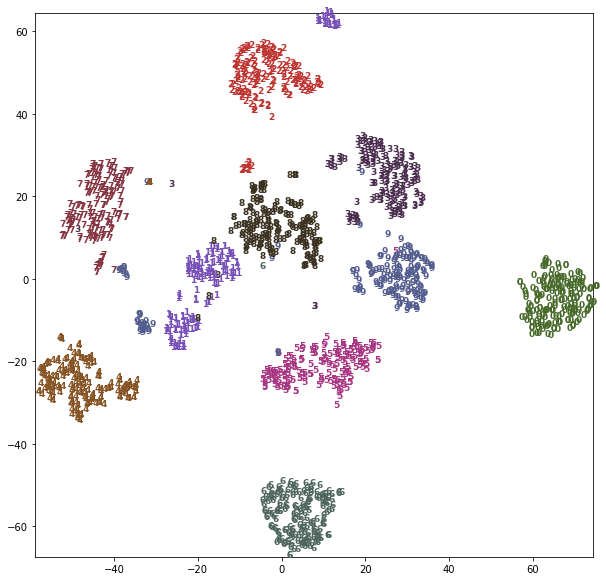

In [179]:
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
"#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max())
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],fontdict={'weight':'bold','size':9})